In [1]:
import pandas as pd
%matplotlib inline

# Data loading

In [12]:
matus = 'FGHJKMNQUVXZ'
sb = pd.read_csv('tmp_SB_data.csv.gz', parse_dates=[0])
sb.head()
sb['expim'] = sb.sym.apply(lambda x: matus.index(x[-3]) if x[-2].isdigit() else matus.index(x[-2]))
sb['expiy'] = sb.sym.apply(lambda x: int(x[-2:]) if x[-2].isdigit() else 10 + int(x[-1]))
sb['expiy'] = sb.expiy.apply(lambda x: x + 2000 if x < 50 else x + 1900)
sb['expi'] = sb.expiy * 100 + sb.expim

sb = sb.set_index(['Unnamed: 0', 'expi'])#.sort_index([1, 0])
sb.head()

PX_OPEN  PX_HIGH  PX_LOW  PX_LAST  VOLUME  OPEN_INT  \
Unnamed: 0 expi                                                          
1989-01-03 198902    11.00    11.03   10.25    10.37     NaN       NaN   
1988-01-04 198902     9.84     9.98    9.75     9.93     NaN       NaN   
1989-01-04 198902    10.45    10.55   10.35    10.46     NaN       NaN   
1988-01-05 198902     9.82     9.95    9.78     9.90     NaN       NaN   
1989-01-05 198902    10.40    10.42   10.10    10.19     NaN       NaN   

                   PX_SETTLE    sym  expim  expiy  
Unnamed: 0 expi                                    
1989-01-03 198902      10.37  SBH89      2   1989  
1988-01-04 198902       9.93  SBH89      2   1989  
1989-01-04 198902      10.46  SBH89      2   1989  
1988-01-05 198902       9.90  SBH89      2   1989  
1989-01-05 198902      10.19  SBH89      2   1989

In [17]:
fc=pd.read_csv("fc.csv",sep=";",decimal=',',index_col="date")  # feeder cattle
fc.index=pd.to_datetime(fc.index)
lc=pd.read_csv("lc.csv",sep=";",decimal=',',index_col="date")  # live cattle
lc.index=pd.to_datetime(lc.index)
lh=pd.read_csv("lh.csv",sep=";",decimal=',',index_col="date")  # live hog
lh.index=pd.to_datetime(lh.index)
fc,lc,lh = fc.sort_index(), lc.sort_index(), lh.sort_index()

for df in [fc,lc,lh]:
    df['expim'] = df.child_ric.apply(lambda x: matus.index(x[-2])+1)
    df['expiy_'] = df.child_ric.apply(lambda x: int(x[-1]))
    df['expiy'] = df['expiy_'] + (df.index.year//10) * 10
    df['expiy'].where(df.index.year % 10 <= df.expiy_, df['expiy'] + 10, inplace = True)
    df['expi'] = df.expiy * 100 + df.expim
    df.drop('expiy_',axis=1)
    df['date'] = df.index
    df.set_index(['date','expi'],inplace = True)
    df['child_ric'] = df.child_ric.str[:-1] + df.expiy.astype(str).str[2:4]

In [18]:
lh.head()

child_ric  settlement  expim  expiy_  expiy
date       expi                                              
1995-12-01 199606     LHM96      53.825      6       6   1996
1995-12-02 199606     LHM96         NaN      6       6   1996
1995-12-03 199606     LHM96         NaN      6       6   1996
1995-12-04 199606     LHM96      54.550      6       6   1996
1995-12-05 199606     LHM96      54.250      6       6   1996

# Roll cycles exploration

In [28]:
import plotly as py
py.offline.init_notebook_mode(connected=True)

import plotly.tools as tls
import matplotlib as mpl
import matplotlib.pyplot as plt


def plot_trend(inst, N = 100):
    mpl_fig = plt.figure(figsize=(16,10))
    cmap = mpl.cm.jet
    i = 0
    for k, d in inst.groupby(level=1):
        print(k,end = ',')
        dd = d.sort_index(level=0)
        plt.plot(dd.index.get_level_values(0), dd.settlement, color=cmap(0.08*((k%100) % 12)), linewidth = 4 , alpha= 0.5) 
        i+=1
        if i>=N:
            return

plotly_fig = tls.mpl_to_plotly

199602,199604,199606,199608,199610,199612,199702,199802,199804,199806,199808,199810,199812,199902,199904,199906,199908,199910,199912,200002,200004,200006,200008,200010,200012,200102,200104,200106,200108,200110,200112,200202,200204,200206,200208,200210,200212,200302,200304,200305,200306,200307,200308,200309,200310,200311,200312,200402,200403,200404,200405,200406,200407,200408,200409,200410,200411,200412,200501,200502,200503,200504,200505,200506,200508,200509,200510,200511,200512,200601,200602,200603,200604,200605,200606,200607,200608,200609,200610,200612,200702,200802,200804,200806,200808,200810,200812,200902,200904,200906,200908,200910,200912,201002,201004,201006,201008,201010,201012,201102,

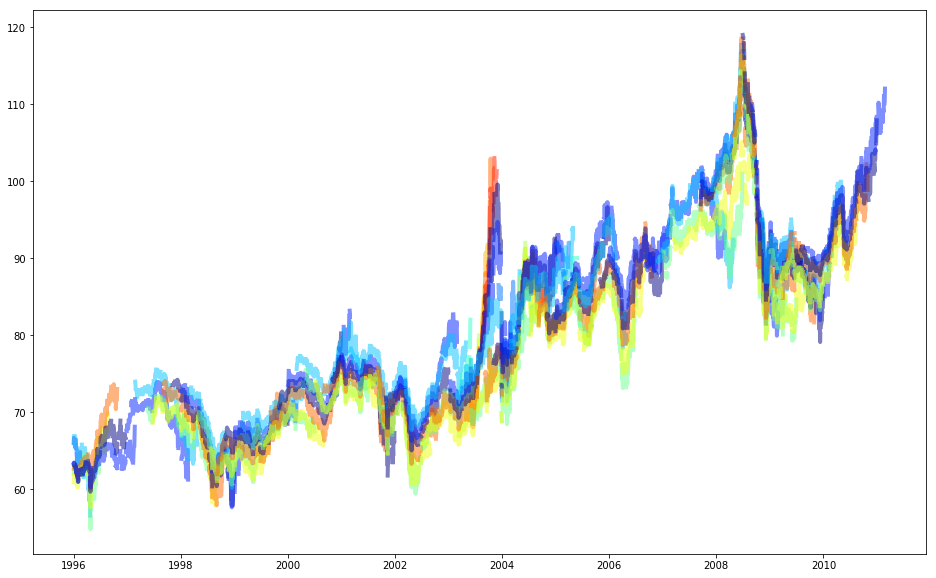

In [29]:
plot_trend(lc)

199602,199604,199606,199607,199608,199610,199612,199702,199802,199804,199806,199807,199808,199810,199812,199902,199904,199906,199907,199908,199910,199912,200002,200004,200006,200007,200008,200010,200012,200102,200104,200106,200107,200108,200110,200112,200202,200204,200205,200206,200207,200208,200210,200212,200302,200304,200305,200306,200307,200308,200310,200312,200402,200404,200405,200406,200407,200408,200410,200412,200502,200504,200505,200506,200507,200508,200510,200512,200602,200604,200605,200606,200607,200608,200610,200612,200702,200705,200802,200804,200805,200806,200807,200808,200810,200812,200902,200904,200905,200906,200907,200908,200910,200912,201002,201004,201005,201006,201007,201008,

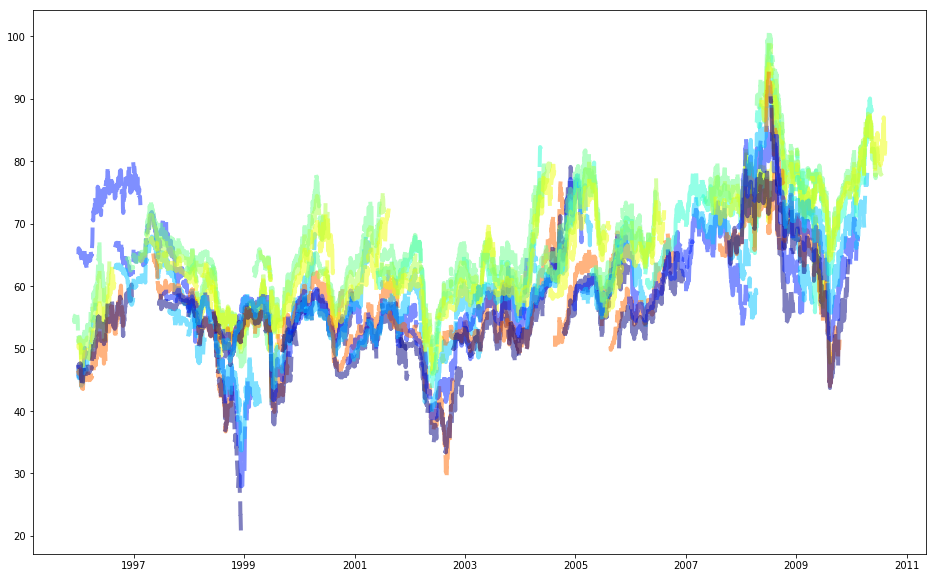

In [32]:
plot_trend(lh)

199601,199603,199604,199605,199608,199609,199801,199803,199804,199805,199808,199809,199810,199811,199901,199903,199904,199905,199908,199909,199910,199911,200001,200003,200004,200005,200008,200009,200010,200011,200101,200103,200104,200105,200108,200109,200110,200111,200201,200203,200204,200205,200208,200209,200210,200211,200301,200303,200304,200305,200308,200309,200310,200311,200401,200403,200404,200405,200408,200409,200410,200411,200501,200503,200504,200505,200508,200509,200510,200511,200601,200603,200604,200605,200608,200609,200801,200803,200804,200805,200808,200809,200810,200811,200901,200903,200904,200905,200908,200909,200910,200911,201001,201003,201004,201005,201008,201009,201010,201011,

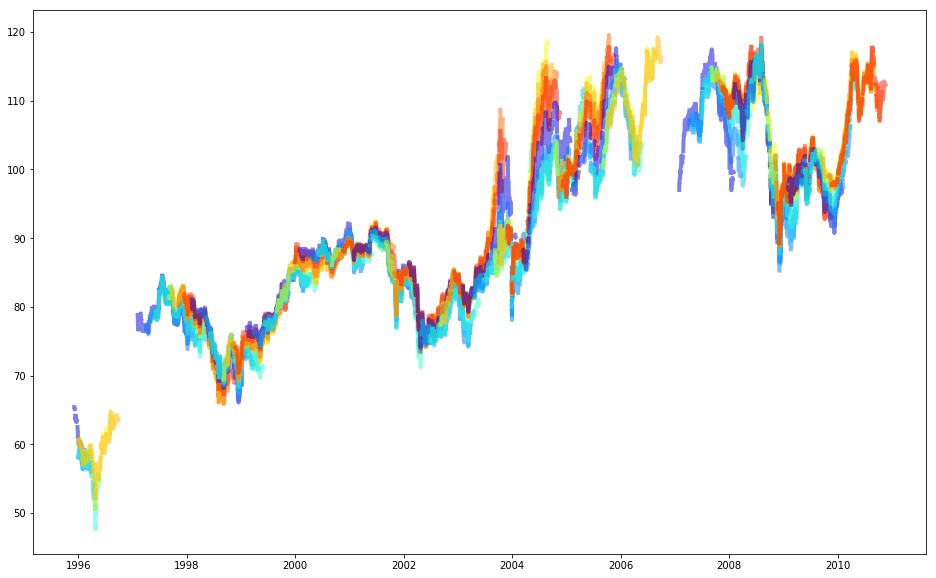

In [30]:
plot_trend(fc)

In [37]:
# no volume data

'''
mpl_fig = plt.figure()

i = 0
for k, d in df.groupby(level=1):

    dd = d.sort_index(level=0)
#     plt.plot(dd.index.get_level_values(0), dd.VOLUME.ewm(3).mean(), color=cmap(0.25*(i % 4)))
    plt.plot(dd.index.get_level_values(0), dd.VOLUME, color=cmap(0.25*(i % 4)),label=k,alpha=0.5)

    
    i+=1
    if i>=50:
        break
'''
pass
# plotly_fig = tls.mpl_to_plotly(mpl_fig)
# plotly_fig['layout'].update(height=500, width=800)

# py.offline.iplot(plotly_fig)

In [40]:
df = sb
vol = pd.DataFrame(df.VOLUME.unstack().idxmax(axis=1)).reset_index()
vol.columns = ['date', 'matu']
#print(vol.groupby('matu').first().head(10))

# 15.02 --> K 
# 15.04 --> N 
# 15.06 --> V
# 15.09 --> H
pass

In [31]:
for i in [lh,fc,lc]:
    print(''.join(sorted(i.child_ric.str.slice(2,3).unique())))

FGJKMNQVZ
FHJKQUVX
FGHJKMNQUVXZ


In [33]:
import datetime

matusDict = {'SB':'HKNV', 'LH':'GJKMNQVZ', 'LC':'FGHJKMNQUVXZ', 'FC':'FHJKQUVX'}
matusFull = 'FGHJKMNQUVXZ'

def liquid_contract(tikr, date):
    year = date.year
    matus = matusDict[tikr]
    for m in matus:
        if date < datetime.date(year, matusFull.index(m)+1, 15):
            return '%s%02d' % (m, date.year % 100)
    return '%s%02d' % (matus[0], (date.year+1) % 100)   
        
     
def next_contract(tikr, maturity, n_ahead):
    matus = matusDict[tikr]
    return '%s%02d' % (matus[(matus.index(maturity[0]) + n_ahead) % len(matus)],
                      (int(maturity[-2:]) + 
                       (matus.index(maturity[0]) + n_ahead) / len(matus)) % 100)

for i in range(1, 100):
    nc = next_contract('SB', 'H99', i)
    print(i, nc)

print('--')    
for i in range(1, 13):
    print(i, liquid_contract('LH', datetime.date(2014, i, 17)))
    
    

1 K99
2 N99
3 V99
4 H00
5 K00
6 N00
7 V00
8 H01
9 K01
10 N01
11 V01
12 H02
13 K02
14 N02
15 V02
16 H03
17 K03
18 N03
19 V03
20 H04
21 K04
22 N04
23 V04
24 H05
25 K05
26 N05
27 V05
28 H06
29 K06
30 N06
31 V06
32 H07
33 K07
34 N07
35 V07
36 H08
37 K08
38 N08
39 V08
40 H09
41 K09
42 N09
43 V09
44 H10
45 K10
46 N10
47 V10
48 H11
49 K11
50 N11
51 V11
52 H12
53 K12
54 N12
55 V12
56 H13
57 K13
58 N13
59 V13
60 H14
61 K14
62 N14
63 V14
64 H15
65 K15
66 N15
67 V15
68 H16
69 K16
70 N16
71 V16
72 H17
73 K17
74 N17
75 V17
76 H18
77 K18
78 N18
79 V18
80 H19
81 K19
82 N19
83 V19
84 H20
85 K20
86 N20
87 V20
88 H21
89 K21
90 N21
91 V21
92 H22
93 K22
94 N22
95 V22
96 H23
97 K23
98 N23
99 V23
----------------------
1 G14
2 J14
3 J14
4 K14
5 M14
6 N14
7 Q14
8 V14
9 V14
10 Z14
11 Z14
12 G15


In [124]:
class Container:
    def __init__(self, data, tick):
        self.data = data
        self.code = tick

    def getTermStructureOn(self, date):
        if date in self.data.index:
            return self.data.loc[date]
        else:
            print("No valid data")
            return None
    def getSpreadsOn(self, date):
        if date in self.data.index:
            dayWindow = self.data.loc[date]
            dayWindow = dayWindow.sort_values('expi')
            outrightList = dayWindow.child_ric.tolist()
            pairs = [outrightList[i] + outrightList[i+1] for i in range(len(outrightList)-1)]
            spreads = pd.DataFrame([self.data.loc[date].settlement.diff().dropna().getva
                                    , pairs])
            return self.data.loc[date].settlement.diff().dropna()
        else:
            print('No valid data')
            return None

In [125]:
fcdata = Container(fc,'FC')

In [126]:
m2 = fcdata.getSpreadsOn('1999-01-12')

In [140]:
spreads = pd.DataFrame([m2.get_values(), m1]).T
spreads.index = ['1997-01-29']*7

In [169]:
datetime.datetime.strptime("2016-06-07", "%Y-%m-%d")

datetime.datetime(2016, 6, 7, 0, 0)

In [176]:
pd.Series.sort_values?

Signature: pd.Series.sort_values(self, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
Docstring:
Sort by the values.

Sort a Series in ascending or descending order by some
criterion.

Parameters
----------
axis : {0 or 'index'}, default 0
    Axis to direct sorting. The value 'index' is accepted for
    compatibility with DataFrame.sort_values.
ascending : bool, default True
    If True, sort values in ascending order, otherwise descending.
inplace : bool, default False
    If True, perform operation in-place.
kind : {'quicksort', 'mergesort' or 'heapsort'}, default 'quicksort'
    Choice of sorting algorithm. See also :func:`numpy.sort` for more
    information. 'mergesort' is the only stable  algorithm.
na_position : {'first' or 'last'}, default 'last'
    Argument 'first' puts NaNs at the beginning, 'last' puts NaNs at
    the end.

Returns
-------
Series
    Series ordered by values.

See Also
--------
Series.sort_index : Sort by the Series indices.
D

In [41]:
start='1998-01-01'
end='2003-01-01'
dts = pd.bdate_range(start, end)
tikr='LH'
matu='m1'
typ='prod'
drs = []
for dt in dts:
    c = liquid_contract(tikr, dt.date())
    drs.append([ dt, next_contract(tikr, c, int(matu[-1])-1)])

# put them on a DF w/ dates as index
dfs = pd.DataFrame(drs, columns = ['time', matu]).set_index('time')

#     print dfs.head()

m1_window = dfs[matu].reset_index().groupby(matu).first()
m1_window.columns = ['first']
m1_window['last'] = dfs[matu].reset_index().groupby(matu).last()
m1_window = m1_window.reset_index().set_index('first').sort_index()
m1_window
#lh.reset_index(level=1).set_index('child_ric', append=True).settlement.unstack()

m1       last
first                     
1998-01-01  G98 1998-02-13
1998-02-16  J98 1998-04-14
1998-04-15  K98 1998-05-14
1998-05-15  M98 1998-06-12
1998-06-15  N98 1998-07-14
1998-07-15  Q98 1998-08-14
1998-08-17  V98 1998-10-14
1998-10-15  Z98 1998-12-14
1998-12-15  G99 1999-02-12
1999-02-15  J99 1999-04-14
1999-04-15  K99 1999-05-14
1999-05-17  M99 1999-06-14
1999-06-15  N99 1999-07-14
1999-07-15  Q99 1999-08-13
1999-08-16  V99 1999-10-14
1999-10-15  Z99 1999-12-14
1999-12-15  G00 2000-02-14
2000-02-15  J00 2000-04-14
2000-04-17  K00 2000-05-12
2000-05-15  M00 2000-06-14
2000-06-15  N00 2000-07-14
2000-07-17  Q00 2000-08-14
2000-08-15  V00 2000-10-13
2000-10-16  Z00 2000-12-14
2000-12-15  G01 2001-02-14
2001-02-15  J01 2001-04-13
2001-04-16  K01 2001-05-14
2001-05-15  M01 2001-06-14
2001-06-15  N01 2001-07-13
2001-07-16  Q01 2001-08-14
2001-08-15  V01 2001-10-12
2001-10-15  Z01 2001-12-14
2001-12-17  G02 2002-02-14
2002-02-15  J02 2002-04-12
2002-04-15  K02 2002-05-14
2002-05-15  M02 2002-06-14
2002-06-17  N02 2002-07-12
2002-07-15  Q02 2002-08-14
2002-08-15  V02 2002-10-14
2002-10-15  Z02 2002-12-13
2002-12-16  G03 2003-01-01

# Continous series

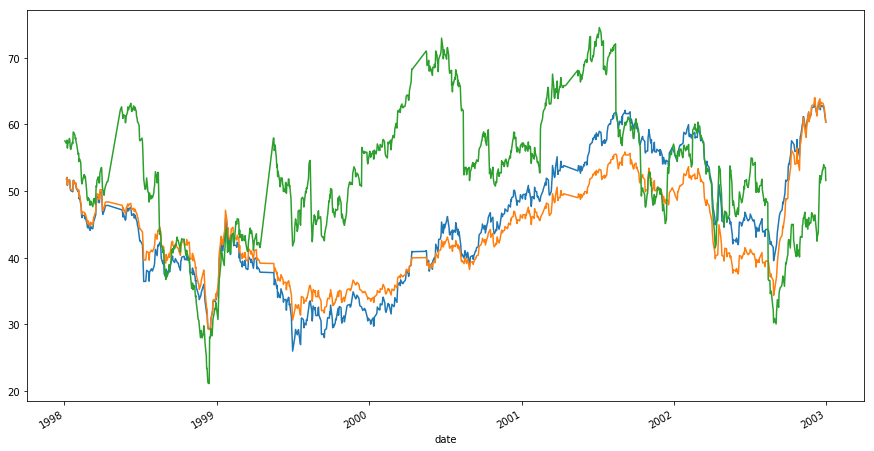

In [70]:
def continous_serie(data = lh, tikr='LH', start='1998-01-01', end='2003-01-01', matu='m1', typ='prod'):

    dts = pd.bdate_range(start, end)

    drs = []
    for dt in dts:
        c = liquid_contract(tikr, dt.date())
        drs.append([ dt, next_contract(tikr, c, int(matu[-1])-1)])

    # put them on a DF w/ dates as index
    dfs = pd.DataFrame(drs, columns = ['time', matu]).set_index('time')

#     print dfs.head()

    m1_window = dfs[matu].reset_index().groupby(matu).first()
    m1_window.columns = ['first']
    m1_window['last'] = dfs[matu].reset_index().groupby(matu).last()
    m1_window = m1_window.reset_index().set_index('first').sort_index()

    #print(m1_window)

    dd = data.reset_index(level=1).set_index('child_ric', append=True).settlement.unstack()

    diffs = []
    retns = []
    series = []

    for i in range(m1_window.shape[0]-1):
        if tikr+m1_window.iloc[i, 0] in dd.columns:
            s = dd.loc[m1_window.index[i]:m1_window.index[i+1], tikr+m1_window.iloc[i, 0]] 
            diffs.append( s.diff().dropna() )
            retns.append( (s / s.shift(1) -1).dropna() )
            series.append(s.dropna())

    if tikr+m1_window.iloc[-1, 0] in dd.columns:
        s = dd.loc[m1_window.index[-1]:m1_window.iloc[-1, 1], tikr+m1_window.iloc[-1, 0]] 
        diffs.append( s.diff().dropna() )
        retns.append( (s / s.shift(1) -1).dropna() )
        series.append(s.dropna())




    serie = pd.concat(series)

    if 'diff' == typ:
        diff = pd.concat(diffs)
        return diff.cumsum() + serie.tail(1)[0]

    elif 'prod' == typ:
        retn = pd.concat(retns)
        return (1 + retn).cumprod() * serie.tail(1)[0]
    elif 'unadj' == typ:
        return serie


continous_serie(typ='diff').plot(figsize=(15, 8))
continous_serie().plot()
continous_serie(typ='unadj').plot()

# continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01').plot()

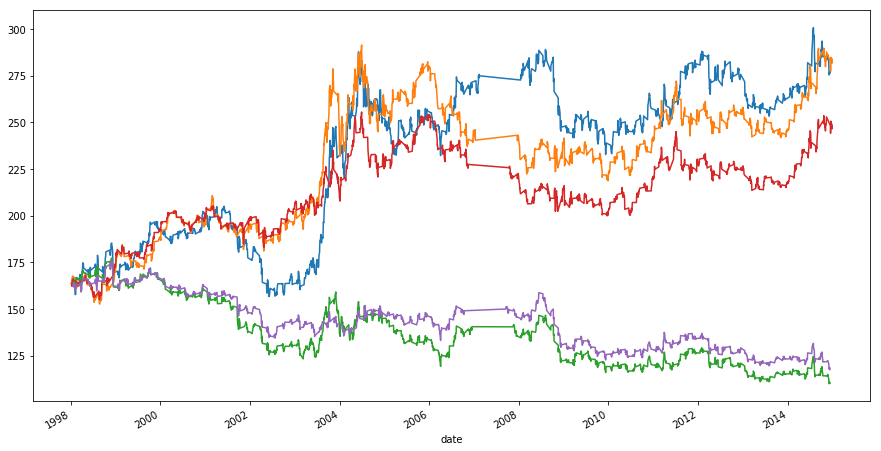

In [71]:
# plot w/ continous series of outrights m1-5
for i in range(5):
    continous_serie(lc,'LC', '1998-01-01', '2015-01-01', 'm%s' % (str(i+1)), 'prod').plot(figsize=(15, 8))

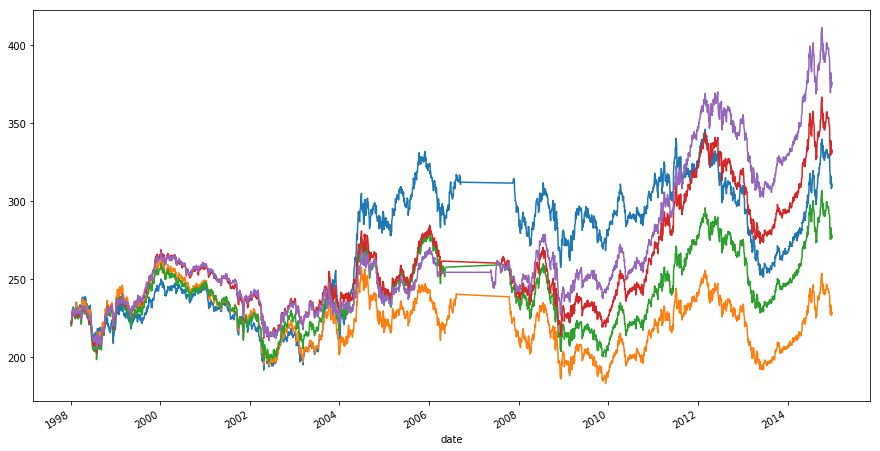

In [485]:
# plot w/ continous series of outrights m1-5
for i in range(5):
    continous_serie(fc,'FC', '1998-01-01', '2015-01-01', 'm%s' % (str(i+1)), 'prod').plot(figsize=(15, 8))

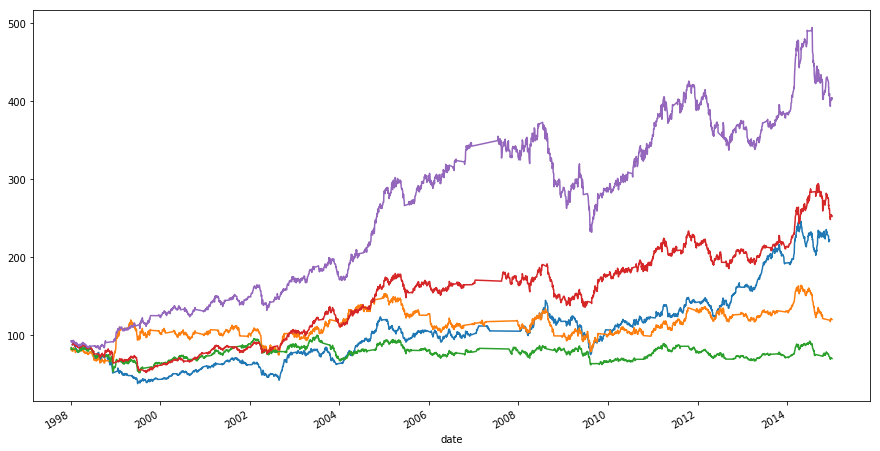

In [487]:
for i in range(5):
    continous_serie(lh,'LH', '1998-01-01', '2015-01-01', 'm%s' % (str(i+1)), 'prod').plot(figsize=(15, 8))

# Term structure exploration

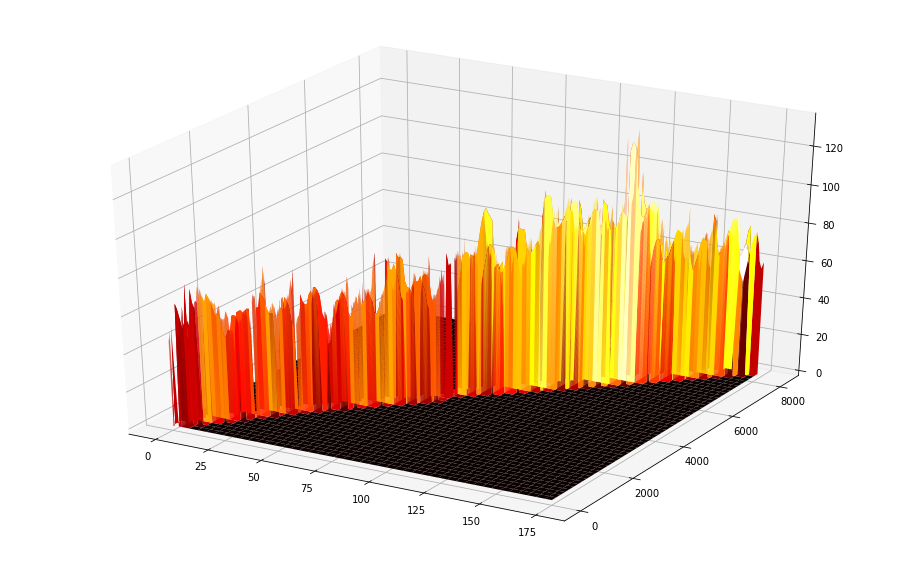

In [85]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

data = lh
dd = data.settlement.unstack().fillna(0)
#print(dd.head())

x = np.arange(len(dd.columns))
y = np.arange(len(dd.index))
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, dd, cmap=plt.cm.hot)#, rstride=1, cstride=1000, color='k', shade=False)

#surf = ax.plot_wireframe(X, Y, dd)

# ax.set_zlim(0, 5)
# ax.set_xlim(0, 51)
# ax.set_zlabel("Intensity")
#ax.view_init(20,120)

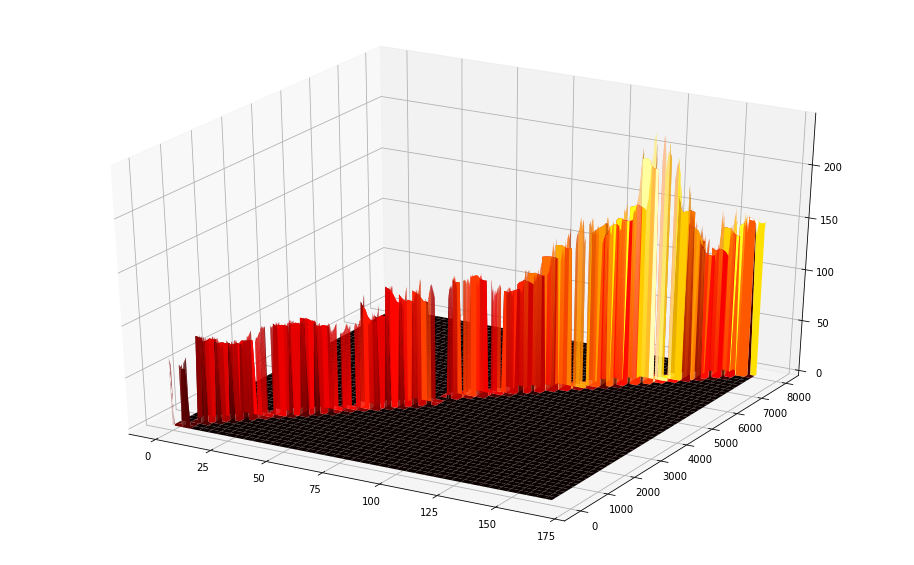

In [88]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

data = fc
dd = data.settlement.unstack().fillna(0)
#print(dd.head())

x = np.arange(len(dd.columns))
y = np.arange(len(dd.index))
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, dd, cmap=plt.cm.hot)#, rstride=1, cstride=1000, color='k', shade=False)

#surf = ax.plot_wireframe(X, Y, dd)

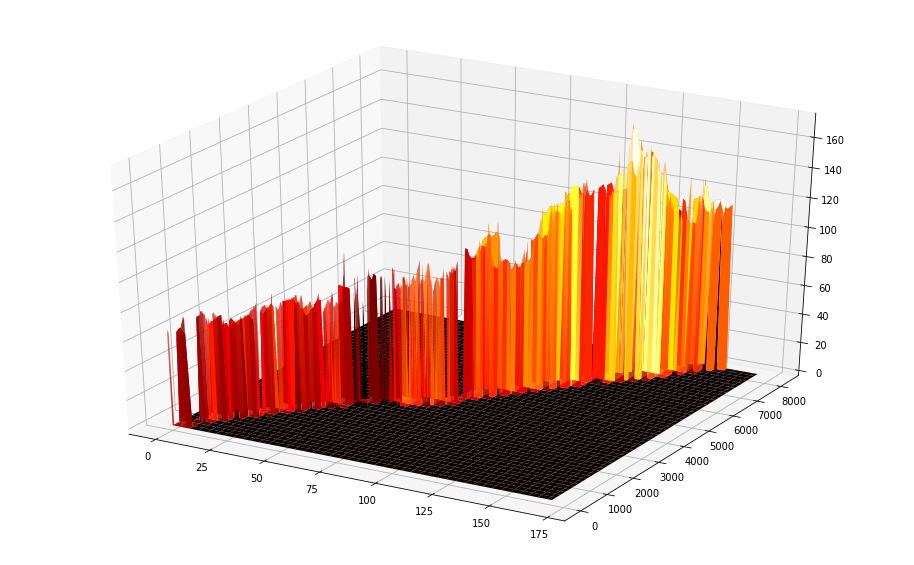

In [87]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

data = lc
dd = data.settlement.unstack().fillna(0)
#print(dd.head())

x = np.arange(len(dd.columns))
y = np.arange(len(dd.index))
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, dd, cmap=plt.cm.hot)#, rstride=1, cstride=1000, color='k', shade=False)

#surf = ax.plot_wireframe(X, Y, dd)

C:\Users\kai\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning:

invalid value encountered in less



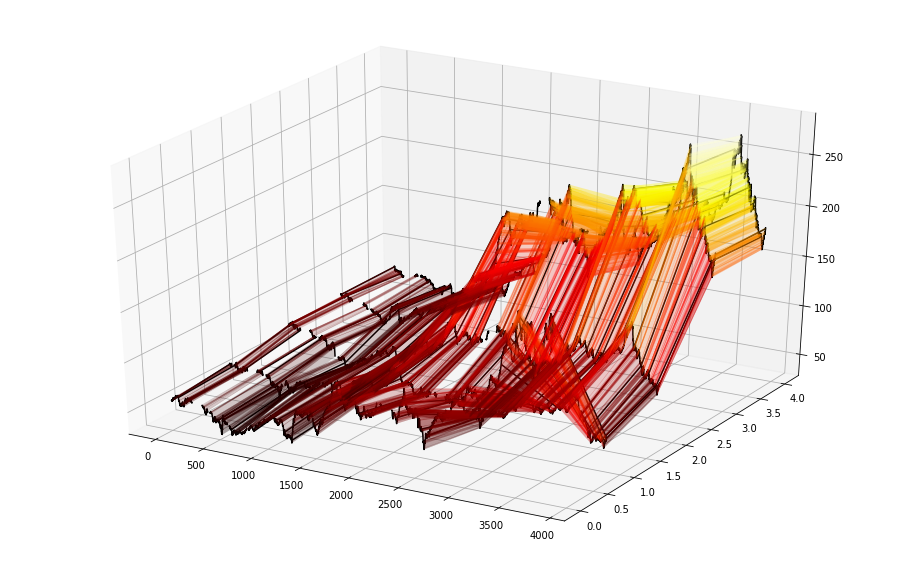

In [112]:
# plot of term structure w/ surface alpha and wireframe
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Z = [continous_serie(lh,'LH', '1996-01-01', '2016-01-01', 'm%s' % (str(i+1)), 'prod') for i in range(5)]
Z = pd.DataFrame(Z)

X,Y = np.meshgrid(range(len(Z.columns)), range(Z.shape[0]))

fig = plt.figure(figsize=(16, 10))
ax=fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, alpha=0.2, vmin=Z.min().min(), vmax=Z.max().max())

In [105]:
Z

date  1996-01-03  1996-01-04  1996-01-05  1996-01-09  1996-01-10  1996-01-11  \
0      57.894530   58.053319   58.339140         NaN         NaN   59.336115   
1      64.317223   64.956136   65.417573   64.816113   64.745353   65.488333   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3      77.019342   76.943907   77.773694   77.210117   76.984686   77.961554   
4      77.393625   77.431656   78.230313   77.586909   77.359825   78.078924   

date  1996-01-12  1996-01-16  1996-01-17  1996-01-18     ...      2015-12-15  \
0      58.757226   59.370289   58.886292   58.628160     ...             NaN   
1      64.957633   65.208296   64.205643   63.740125     ...       61.356193   
2            NaN         NaN         NaN         NaN     ...       84.574277   
3      77.585835   77.962648   76.530758   75.174231     ...      180.615289   
4      78.041076   78.079108   76.329649   74.580190     ...      177.475210   

date  2015-12-16  2015-12-17  2015-12-18  2015-12-22  2015-12-23  2015-12-24  \
0     199.025972  191.721478  194.643276  196.022502  199.211962  201.022196   
1      60.925959   58.822591   59.324531   60.090009   60.927251   62.266837   
2      84.222982   82.612880   82.876351   83.345905   84.637180   86.280620   
3     180.971064  177.769086  178.006270  178.303839  181.339052  184.731348   
4     177.823999  175.208085  175.789399  175.847996  179.187994  181.883432   

date  2015-12-29  2015-12-30  2015-12-31  
0     201.107195  203.232166  203.317164  
1      62.101860   62.243269   62.172564  
2      85.787754   85.729770   85.410856  
3     183.908229  183.790641  183.437875  
4     181.185446  181.069115  181.127280  

[5 rows x 3861 columns]

C:\Users\kai\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning:

invalid value encountered in less



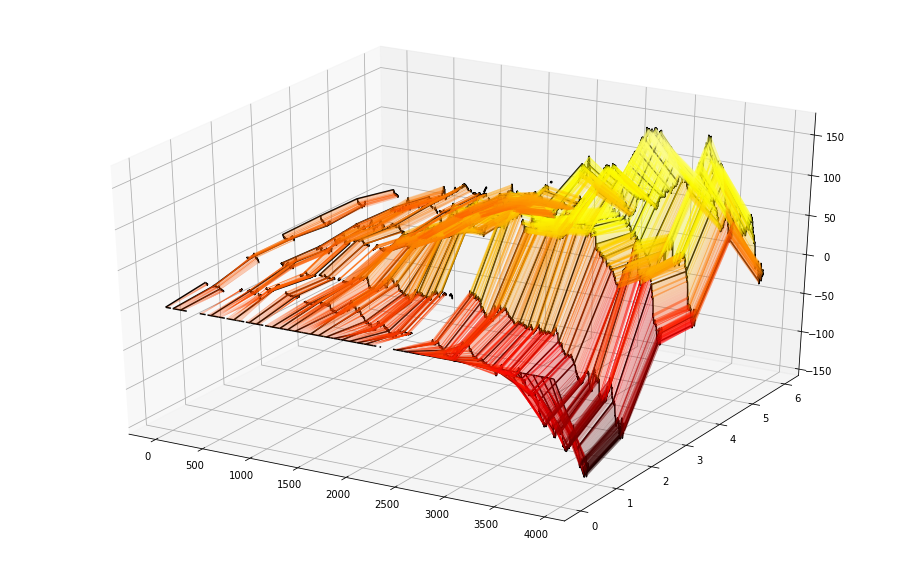

In [124]:
# plot of term structure w/ surface alpha and wireframe
# with m* - m1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Z = [continous_serie(lh,'LH', '1996-01-01', '2016-01-01', 'm%s' % (str(i+1)), 'prod') for i in range(7)]
Z = pd.DataFrame(Z)
Z = pd.DataFrame(Z.values - Z.iloc[0].values, columns=Z.columns)


X,Y = np.meshgrid(range(len(Z.columns)), range(Z.shape[0]))


fig = plt.figure(figsize=(16, 10))
ax=fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
_ = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, alpha=0.3, vmin=Z.min().min(), vmax=Z.max().max())

# Seasonality exploration

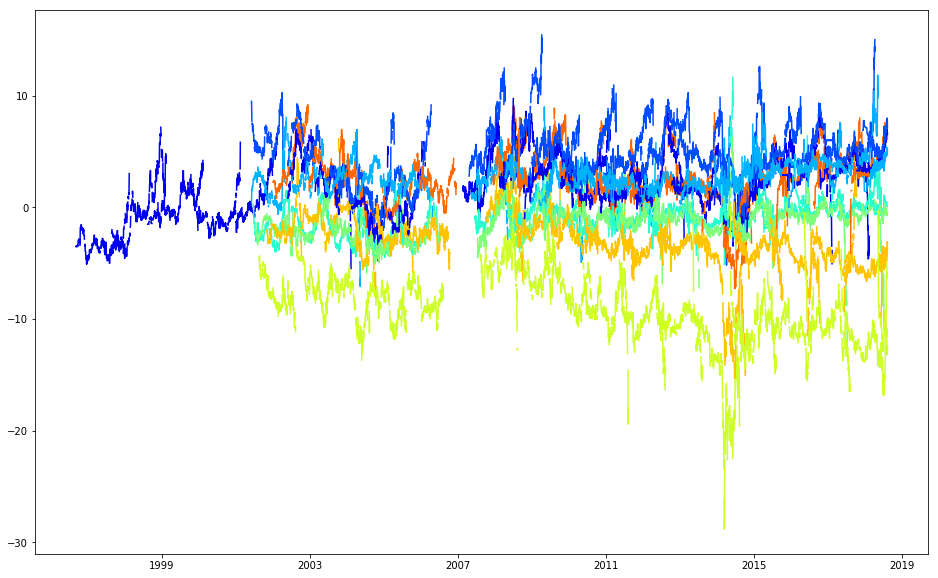

In [140]:
# print df.reset_index(level=1).set_index('sym', append=True).PX_LAST.unstack().head()
import matplotlib as mpl
import matplotlib.pyplot as plt
cmap = mpl.cm.jet


data = lh #lc, fc
dd = data.reset_index(level=1).set_index('child_ric', append=True).settlement.unstack()

mpl_fig = plt.figure(figsize=(16, 10))

c = liquid_contract('LH', datetime.date(1998, 1, 1))

for i in range(30):
    try:
        for j in range(8):
            spd = dd['LH' + next_contract('LH', c, j+1 + 8 * i)] - dd['LH' + next_contract('LH', c, j + 8 * i)]
            plt.plot(spd.index, spd, color = cmap(j/10+0.1))
    except KeyError:
        pass
    
# still has some problem


#plotly_fig = tls.mpl_to_plotly(mpl_fig)
#plotly_fig['layout'].update(height=500, width=800)

#py.offline.iplot(plotly_fig)

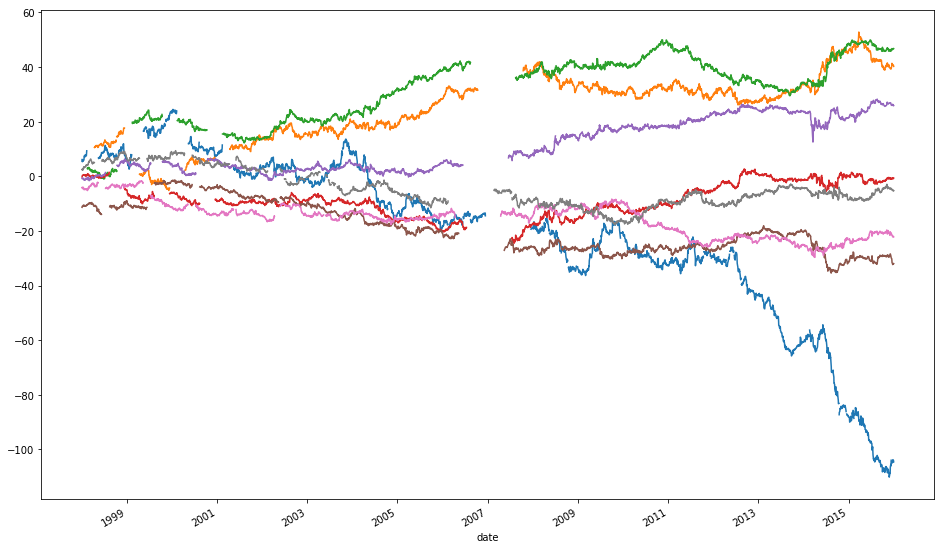

In [142]:
# plot of continous series of spreads
for i in range(8):
    o1 = continous_serie(lh,'LH', '1998-01-01', '2016-01-01', 'm%s' % (str(i+1)),'diff')
    o2 = continous_serie(lh,'LH', '1998-01-01', '2016-01-01', 'm%s' % (str(i+2)),'diff')
    s = (o2-o1)
    s.plot(figsize=(16, 10))

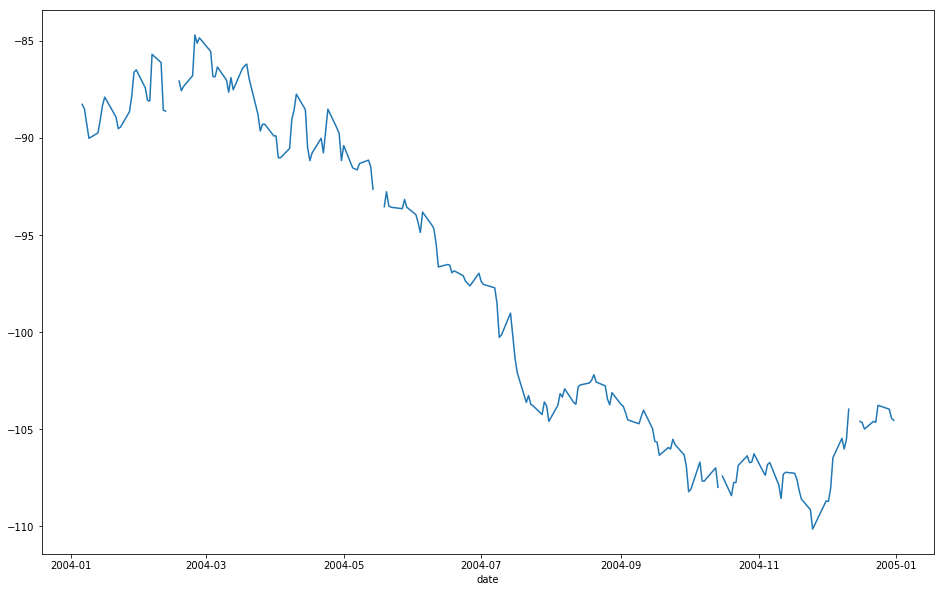

In [143]:
o1 = continous_serie(lh,'LH', '1998-01-01', '2016-01-01', 'm1', 'diff')
o2 = continous_serie(lh,'LH', '1998-01-01', '2016-01-01', 'm2', 'diff')
s = (o2-o1)

for k, v in s.groupby(s.index.year):
    v.index = v.index.map(lambda x: datetime.date(2004, x.month, x.day))
    
v.plot(figsize=(16, 10))

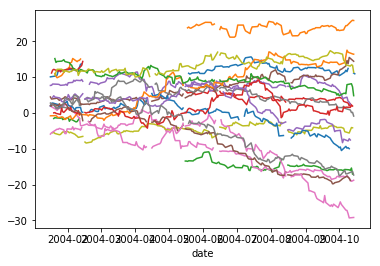

In [538]:
for y in range(1998, 2017):

    o1 = continous_serie(lh,'LH', '%s-01-01' % y, '%s-01-01' % (y+1), 'm1', 'diff')
    o2 = continous_serie(lh,'LH', '%s-01-01' % y, '%s-01-01' % (y+1), 'm2', 'diff')
    s = (o2-o1)

    s.index = s.index.map(lambda x: datetime.date(2004, x.month, x.day))
    
    s.plot()

C:\Users\kai


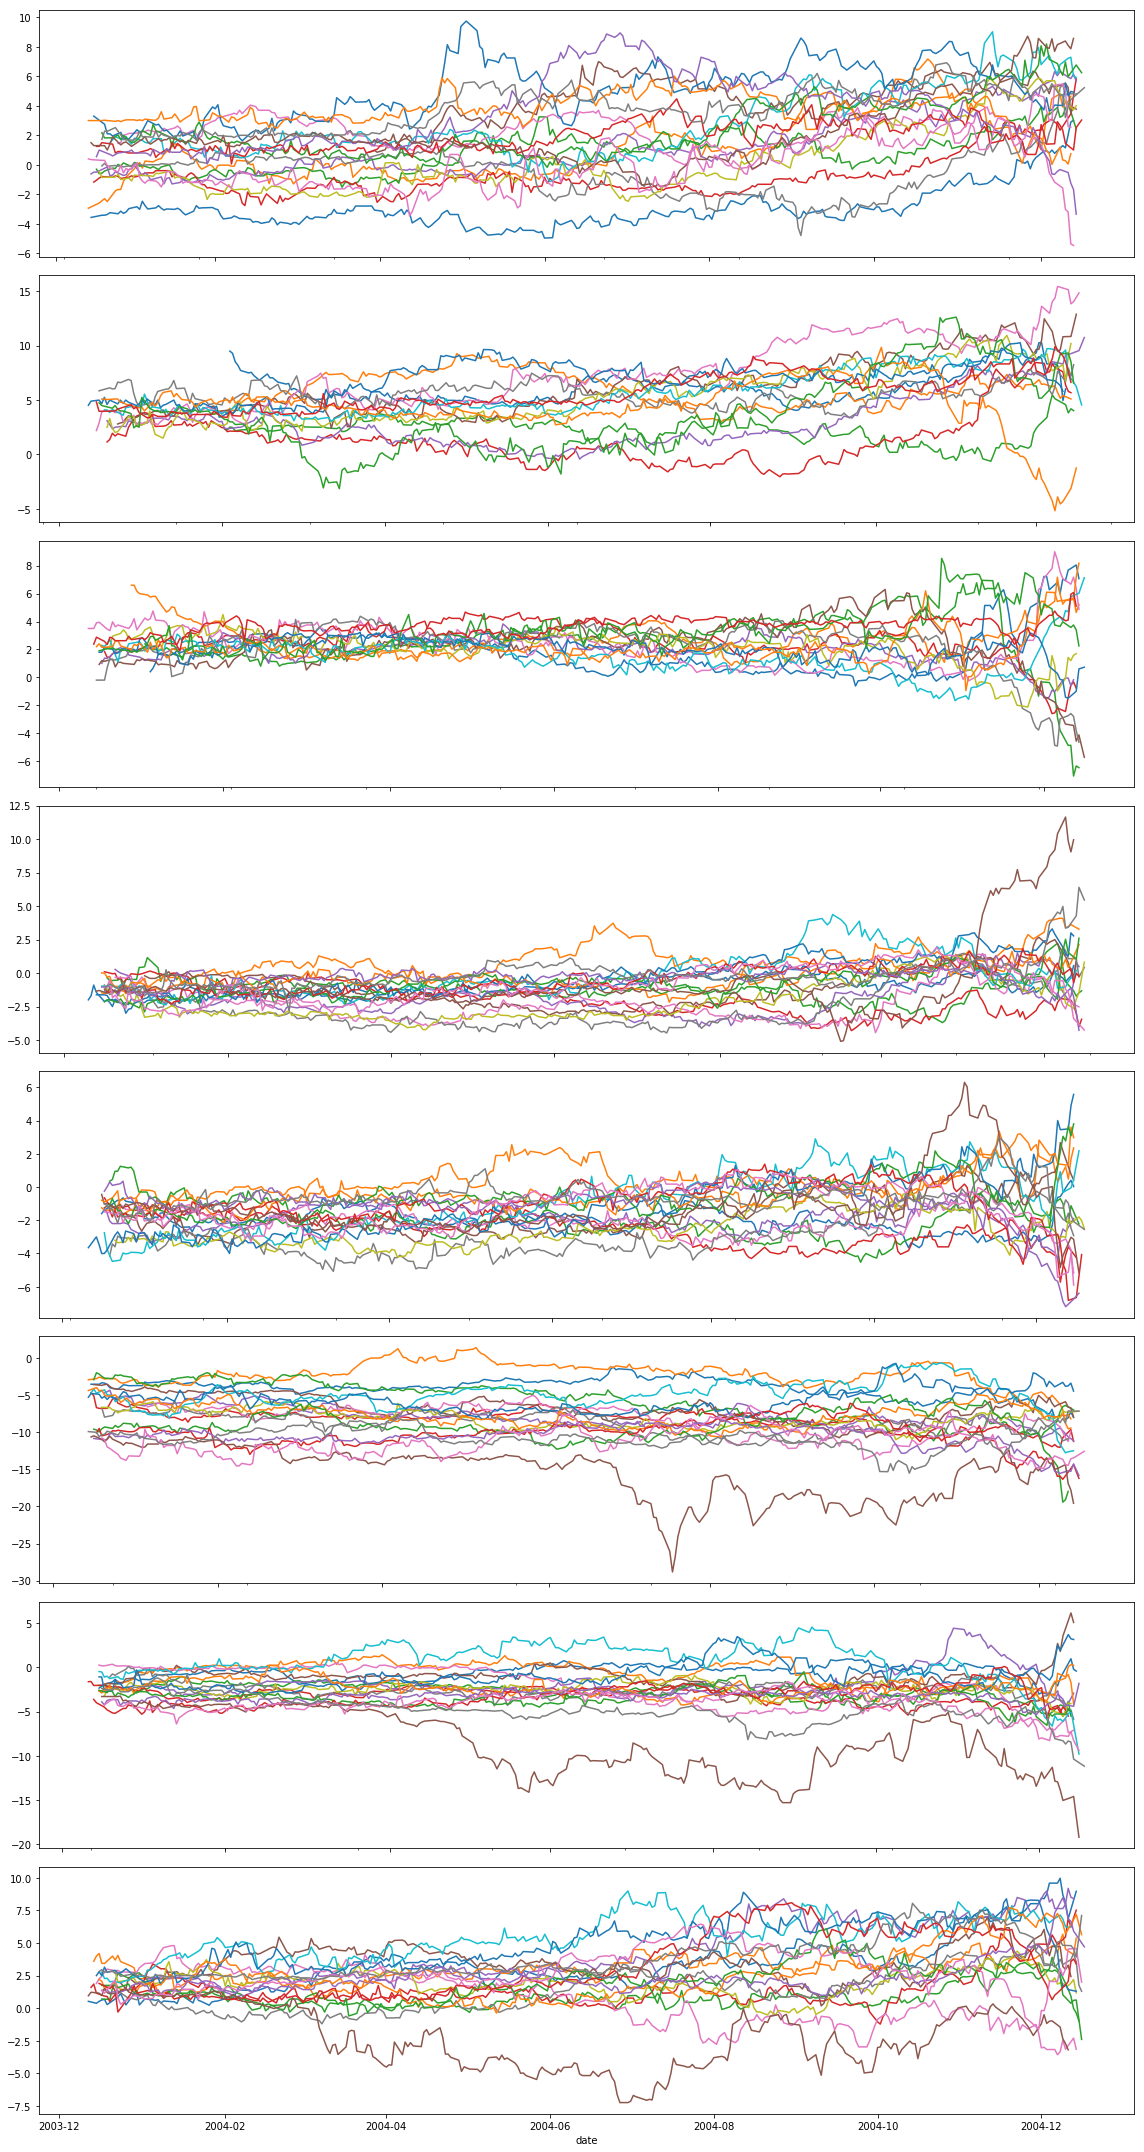

In [145]:
def plot_all_spreads(tikr='LH', m='H'):

    data = lh
    dd = data.reset_index(level=1).set_index('child_ric', append=True).settlement.unstack()
    fig = plt.figure(figsize=(16, 30))
    ax = None
    for i, m in enumerate(matusDict[tikr]):
        plt.subplot(10+len(matusDict[tikr])*100+i+1)
        for y in range(1997, 2017):
            try:
                matu = '%s%02d' % (m, y%100)
                nxt = next_contract(tikr, matu, 1)
                s = (dd['%s%s' % (tikr, nxt)] - dd['%s%s' % (tikr, matu)])#.dropna()

                # cleanup
                s = s.dropna()
                notfeb29 = s.index.map(lambda x: not (x.month == 2 and x.day == 29))
                s = s.loc[notfeb29.values]

                ldt = s.tail(1).index.date[0]
                ix = s.index.map(lambda x: datetime.date(2004 - (ldt.year - x.year), 
                                                         x.month, x.day))
                s.index = ix

                if ax is not None:
                    s.tail(252).plot(sharex=ax)
                else:
                    ax = s.tail(252).plot()
            except (KeyError,IndexError):
                pass
            
    plt.tight_layout()

    
plot_all_spreads('LH')   


# still has little error

In [146]:
def plot_all_spreads_center(tikr='LH', month=10, day=6):
    ax = None
    data = lh
    dd = data.reset_index(level=1).set_index('child_ric', append=True).settlement.unstack()
    fig = plt.figure(figsize=(16, 30))
    for i, m in enumerate(matusDict[tikr]):
        try:
            plt.subplot(len(matusDict[tikr])*100+10+i+1)
            mpf = []
            for y in range(1997, 2017):
                matu = '%s%02d' % (m, y%100)
                nxt = next_contract(tikr, matu, 1)
                s = (dd['%s%s' % (tikr, nxt)] - dd['%s%s' % (tikr, matu)])#.dropna()

                # cleanup
                notfeb29 = s.index.map(lambda x: not (x.month == 2 and x.day == 29))
                s = s.loc[notfeb29.values]            
                s = s.dropna()

                # reverse ewm
                #print s.diff().sort_index(ascending=False)
                smn = s.diff().sort_index(ascending=False).ewm(span=10).mean()
                smn = smn.sort_index(ascending=True)
                #smn = s.diff().ewm(span=10).mean()

                #break

                ldt = s.tail(1).index.date[0]
                ix = s.index.map(lambda x: datetime.date(2004 - (ldt.year - x.year), 
                                                         x.month, x.day))
                smn.index = ix
                mpf.append(smn)

            mpf = pd.concat(mpf, axis=1)
            mcf = mpf.mean(axis=1).tail(252).cumsum()
            if ax is not None:
                ax = mcf.plot(sharex=ax)
            else:
                ax = mcf.plot()
        except (KeyError):
            pass
        
        #ax.set_xlim([datetime.date(2003,1,1), datetime.date(2004,12,31)])
#         mcf = mpf.mean(axis=1).tail(252).plot()

#         (mcf + mpf.std(axis=1).tail(252)*np.sqrt(10)).plot(color='orange')
#         (mcf - mpf.std(axis=1).tail(252)*np.sqrt(10)).plot(color='orange')


        
#         mpf.std(axis=1).tail(252).plot()
        
#             break
#         break
    
    plt.tight_layout()
            
#plot_all_spreads_center('LH')            

In [565]:
def plot_all_spreads_center(tikr='SB', month=10, day=6):

    dd = df.reset_index(level=1).set_index('sym', append=True).PX_LAST.unstack()
    fig = plt.figure(figsize=(16, 10))
    for i, m in enumerate('HKNV'):
        plt.subplot(220+i+1)
        for y in range(1989, 2017):
            matu = '%s%02d' % (m, y%100)
            nxt = next_contract(tikr, matu, 1)
            s = (dd['%s%s' % (tikr, nxt)] - dd['%s%s' % (tikr, matu)])#.dropna()

            # cleanup
            s = s.dropna()
            notfeb29 = s.index.map(lambda x: not (x.month == 2 and x.day == 29))
            s = s.loc[notfeb29.values]

            # center
            ldt = s.tail(1).index.date[0]
            cdt = datetime.date(ldt.year, month, day) if month*100+day < ldt.month*100+ldt.day \
                                                      else datetime.date(ldt.year - 1, month, day)
            acdt = s.index[s.index.date <= cdt][-1]
            s = s - s[acdt]
            
            ix = s.index.map(lambda x: datetime.date(2004 - (ldt.year - x.year), 
                                                     x.month, x.day))
            s.index = ix
            s.tail(252).plot()
            
#             break
#         break
            
#plot_all_spreads_center('SB')            

# TF or MR

In [ ]:
s1 = continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01', matu='m1')
_ = s1.plot()
m1 = s1.ewm(alpha=0.05).mean()
_ = m1.plot()

In [ ]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(s1.diff().dropna(), lags=30)

In [ ]:
m1 = s1 / s1.ewm(halflife=2).mean() -1
m2 = s1 / s1.ewm(halflife=3).mean() -1
m3 = s1 / s1.ewm(halflife=5).mean() -1
m4 = s1 / s1.ewm(halflife=20).mean() -1

r = (s1.shift(-1)/s1-1)
r.plot()
v = r.ewm(span=10).std()
v.plot()

pf = (s1.shift(-1)/s1-1)

# m1.plot()
# (-m1/v * pf).cumsum().plot()
# (-(m2 - m1)/v * pf).cumsum().plot()
# (-(m3 - m2)/v * pf).cumsum().plot()
# ((m4-2*m3)/v * pf).cumsum().plot()

In [130]:
o1 = continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01', matu='m1')
o2 = continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01', matu='m2')
s1 = (o2 - o1).dropna()
_ = s1.plot()

import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(s1.diff().dropna(), lags=30)

TypeError: continous_serie() got an unexpected keyword argument 'beg'

In [129]:
m1 = s1 - s1.ewm(halflife=2).mean()
m2 = s1 - s1.ewm(halflife=3).mean()
m3 = s1 - s1.ewm(halflife=5).mean()
m4 = s1 - s1.ewm(halflife=22).mean()

v = s1.ewm(span=10).std()

pf = s1.diff().shift(-1)

mpl_fig = plt.figure()

# m4.plot()
# (m4 * pf).cumsum().plot()
# (-(m2 - m1) * pf).cumsum().plot()
# (-(m3 - m2) * pf).cumsum().plot()
# ((m4-m3) * pf).cumsum().plot()
((m4-m3)/v * pf).cumsum().plot()

# ((m4-m3)/v * o1.diff().shift(-1)).cumsum().plot()
# ((m4-m3)/v * o2.diff().shift(-1)).cumsum().plot()




# plotly_fig = tls.mpl_to_plotly(mpl_fig)
# plotly_fig['layout'].update(height=500, width=800)

# py.offline.iplot(plotly_fig)

NameError: name 's1' is not defined

In [ ]:
o3 = continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01', matu='m3')
o2 = continous_serie(tikr='SB', beg='1989-01-01', end='2017-01-01', matu='m2')
s = (o3 - o2).dropna()
_ = s.plot()

# tsa.plot_acf(s.diff().dropna(), lags=30)

In [ ]:
m1 = s - s.ewm(span=2).mean()
m2 = s - s.ewm(span=3).mean()
m3 = s - s.ewm(span=5).mean()
m4 = s - s.ewm(span=20).mean()

v = s.ewm(span=10).std()

pf = s.diff().shift(-1)

mpl_fig = plt.figure()

# m4.plot()
# (m1/v * pf).cumsum().plot()
# ((m2 - m1)/v * pf).cumsum().plot()
# ((m3 - m2)/v * pf).cumsum().plot()
((m4 - m3)/v * pf).cumsum().plot()

plotly_fig = tls.mpl_to_plotly(mpl_fig)
plotly_fig['layout'].update(height=500, width=800)

py.offline.iplot(plotly_fig)

# Sam's Notes
* 3 things for spread-2
 * what is the spread going to do the next 10 days season-wise
 * is it cheap season-wise
 * is it relatively cheap to spread-1 season-wise
 * (is it cheap TF-wise)
 
* the short-term is always right

* spreads roll 30 days before expiry
 